In [2]:
import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt
import plotly.express as px

In [3]:

df = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')

In [4]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [ ]:
df.isnull()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7039,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7040,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7041,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [ ]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [ ]:
df.columns=df.columns.str.lower().str.replace(' ','_')
df.columns

Index(['customerid', 'gender', 'seniorcitizen', 'partner', 'dependents',
       'tenure', 'phoneservice', 'multiplelines', 'internetservice',
       'onlinesecurity', 'onlinebackup', 'deviceprotection', 'techsupport',
       'streamingtv', 'streamingmovies', 'contract', 'paperlessbilling',
       'paymentmethod', 'monthlycharges', 'totalcharges', 'churn'],
      dtype='object')

In [ ]:
del df['customerid']

**EDA**

In [ ]:
fig = px.pie(df,names = 'churn', template='simple_white',title='Churn')
fig.show()

<Axes: xlabel='churn', ylabel='count'>

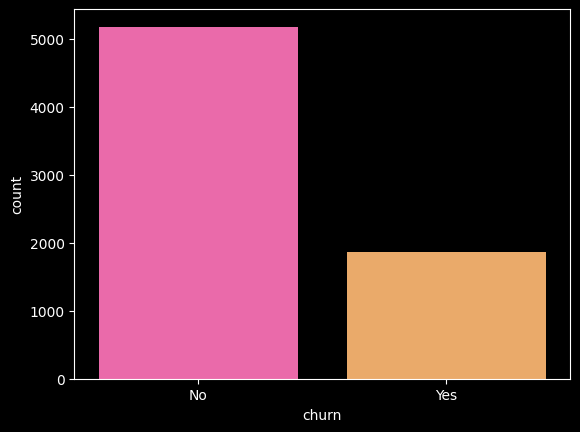

In [ ]:
plt.style.use("dark_background")
sns.countplot(x='churn',data=df,palette='spring')

<Axes: xlabel='churn', ylabel='count'>

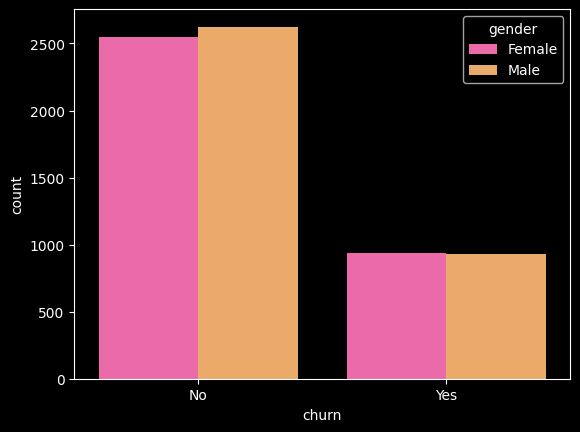

In [ ]:
sns.countplot(x='churn',hue='gender',data=df,palette='spring')

<Axes: xlabel='churn', ylabel='count'>

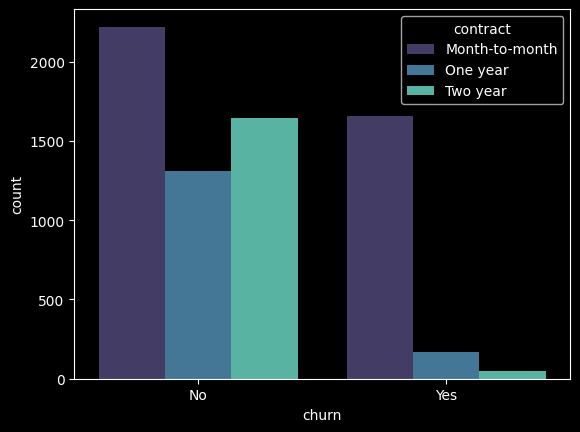

In [ ]:
sns.countplot(x='churn',hue='contract',data=df,palette='mako')

In [ ]:
print(df.groupby('churn').monthlycharges.describe().round(0))

        count  mean   std   min   25%   50%   75%    max
churn                                                   
No     5174.0  61.0  31.0  18.0  25.0  64.0  88.0  119.0
Yes    1869.0  74.0  25.0  19.0  56.0  80.0  94.0  118.0


**Data Preprocessing**

In [ ]:
df_transformed = df.copy()

In [ ]:
col1=['gender','partner','dependents','paperlessbilling','churn','phoneservice']

In [ ]:
for i in col1:
  if i =='gender':
    df_transformed[i]=df_transformed[i].map({'Female':0,'Male':1})
  else:
    df_transformed[i]=df_transformed[i].map({'Yes':1,'No':0})


In [ ]:
col2=[ 'multiplelines', 'internetservice',
       'onlinesecurity', 'onlinebackup', 'deviceprotection', 'techsupport',
       'streamingtv', 'streamingmovies', 'contract',
       'paymentmethod']

In [ ]:
df_transformed=pd.get_dummies(df_transformed,columns=col2)

In [ ]:
from sklearn.preprocessing import LabelEncoder
lenc= LabelEncoder()

In [ ]:
df1=df_transformed.copy()

for i in df_transformed.columns:
  df1[i]=lenc.fit_transform(df_transformed[i])

In [ ]:
df1.head()

,gender,seniorcitizen,partner,dependents,tenure,phoneservice,paperlessbilling,monthlycharges,totalcharges,churn,...,streamingmovies_No,streamingmovies_No internet service,streamingmovies_Yes,contract_Month-to-month,contract_One year,contract_Two year,paymentmethod_Bank transfer (automatic),paymentmethod_Credit card (automatic),paymentmethod_Electronic check,paymentmethod_Mailed check
0,0,0,1,0,1,0,1,142,2505,0,...,1,0,0,1,0,0,0,0,1,0
1,1,0,0,0,34,1,0,498,1466,0,...,1,0,0,0,1,0,0,0,0,1
2,1,0,0,0,2,1,1,436,157,1,...,1,0,0,1,0,0,0,0,0,1
3,1,0,0,0,45,0,0,266,1400,0,...,1,0,0,0,1,0,1,0,0,0
4,0,0,0,0,2,1,1,729,925,1,...,1,0,0,1,0,0,0,0,1,0


In [ ]:
#logistic Regression

In [ ]:
x=df1.drop('churn',axis=1)
y= df1['churn']

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x_train, x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=2)

In [ ]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(5634, 40)
(1409, 40)
(5634,)
(1409,)


In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
churn_model=LogisticRegression()

In [ ]:
churn_model.fit(x_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



LogisticRegression()

In [ ]:
pred= churn_model.predict(x_test)

In [ ]:
pred

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
import sklearn.metrics as sm
acc= sm.accuracy_score(y_test,pred)
acc


0.8055358410220014

In [ ]:
from sklearn.metrics import classification_report as cr
print(cr(y_test,pred))

              precision    recall  f1-score   support

           0       0.85      0.91      0.88      1061
           1       0.64      0.50      0.56       348

    accuracy                           0.81      1409
   macro avg       0.74      0.70      0.72      1409
weighted avg       0.79      0.81      0.80      1409

